In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'Molpos-ribosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'Molpos-tRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'Molpos-crowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                molposTS = float(params.loc[params['param']=='_molPosTS_']['val'].values[0])
                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))
            except:
                print("Error (e.g., Missing expt or incorrect input)")
    print(len(r2_lists[0]))
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS

from analysis_parameters import *
%load_ext autoreload
%autoreload

#First calculate how, on average, volume fraction of ribosomes, crowders, ternary complexes changes w/ growth rate
dbl_rate=np.arange(0,5,0.1)
vox_len = list()
rib_volfrac=list()
tern_volfrac = list()
crowder_volfrac = list()
total_volfrac =list()
rib_num=list()
tern_num=list()
crowder_num=list()
#print(f_vol(dbl_rate[-1]))
#print(f_tern(dbl_rate[99]))

for i in range(len(dbl_rate)):
    cell_volfrac_tot = list()
    cellParams, voxelParams = calcParams(f_rib(dbl_rate[i]),
                                               f_tern(dbl_rate[i]),
                                               f_mass(dbl_rate[i]),
                                               f_vol(dbl_rate[i]),
                                               f_nuc(dbl_rate[i]))
    #print(rib_volfrac)

    if(voxelParams[1][3]<0.8): ###A hard cap on max total volume fraction; set because Qi & Tanner 2011 show that ~0.8 is max for bidisperse system with lambda~5. Thus other parameter combinations must be invalid
        vox_len.append(voxelParams[0])
        rib_volfrac.append(voxelParams[1][0])
        tern_volfrac.append(voxelParams[1][1])
        crowder_volfrac.append(voxelParams[1][2])
        total_volfrac.append(voxelParams[1][3])
        rib_num.append(voxelParams[2][0])
        tern_num.append(voxelParams[2][1])
        crowder_num.append(voxelParams[2][2])
        cell_volfrac_tot.append(cellParams[1][3])
    print(voxelParams[2][0])

#print(np.average(total_volfrac),np.std(total_volfrac), "   ", np.average(cell_volfrac_tot),np.std(cell_volfrac_tot))
print(cellParams)


-21.92821444871448
-15.837967398850656
-10.259017394610458
-5.362965982132004
-1.2124230425595681
2.2096303140417315
4.968008074173073
7.149513151919034
8.845539675099523
10.142077044090186
11.115002884466719
11.828658657692069
12.336220114604219
12.680902980953078
12.89744618257596
13.013579874802375
13.051344429833975
13.028214597520593
12.958027883327839
12.85173634125209
12.718007904476963
12.563703718301392
12.394255366679543
12.213962317107741
12.02622628854291
11.833735983877625
11.638612859734662
11.442526337821423
11.2467850429598
11.052409213798365
10.860188303400458
10.670726906049854
10.484481461221646
10.301789653015254
10.12289400942345
9.947960883896
9.777095750942701
9.61035555189477
9.447758673966016
9.289293025837306
9.134922578741778
8.984592667758033
8.8382342893294
8.695767584520507
8.557104660567436
8.422151873830279
8.29081167372908
8.162984088394161
8.038567917621204
7.91746168652827
(4.17968896283971, [0.23992263590455815, 0.1960233439892945, 0.0309878664265922

190
54.69659067330635
190
32.46391806722688
190
26.542750155617814
190
21.553139589168996
Error (e.g., Missing expt or incorrect input)
190
20.137721093728498
190
18.902845860566448


Text(0, 0.5, 'MSD')

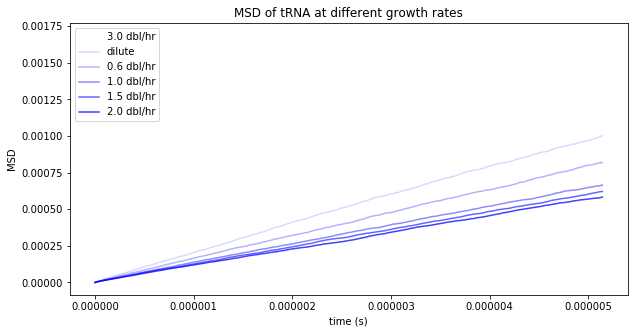

In [2]:
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190319_1948/"
fig,ax = plt.subplots(figsize=(10,5))
labels = ['dilute','0.6 dbl/hr','1.0 dbl/hr','1.5 dbl/hr','2.0 dbl/hr','2.5 dbl/hr','3.0 dbl/hr']
for i in range(0,6):
    MSD_data = MSD(path+data,i*50,i*50+50,'tRNA')
    ax.plot(MSD_data[2],MSD_data[1],color='blue',label=labels[i-1],alpha=0.15*i)
    print((MSD_data[1][-1]-MSD_data[1][0])/(6*(MSD_data[2][-1]-MSD_data[2][0])))
ax.legend()
ax.set_title('MSD of tRNA at different growth rates')

ax.set_xlabel("time (s)")
ax.set_ylabel("MSD")

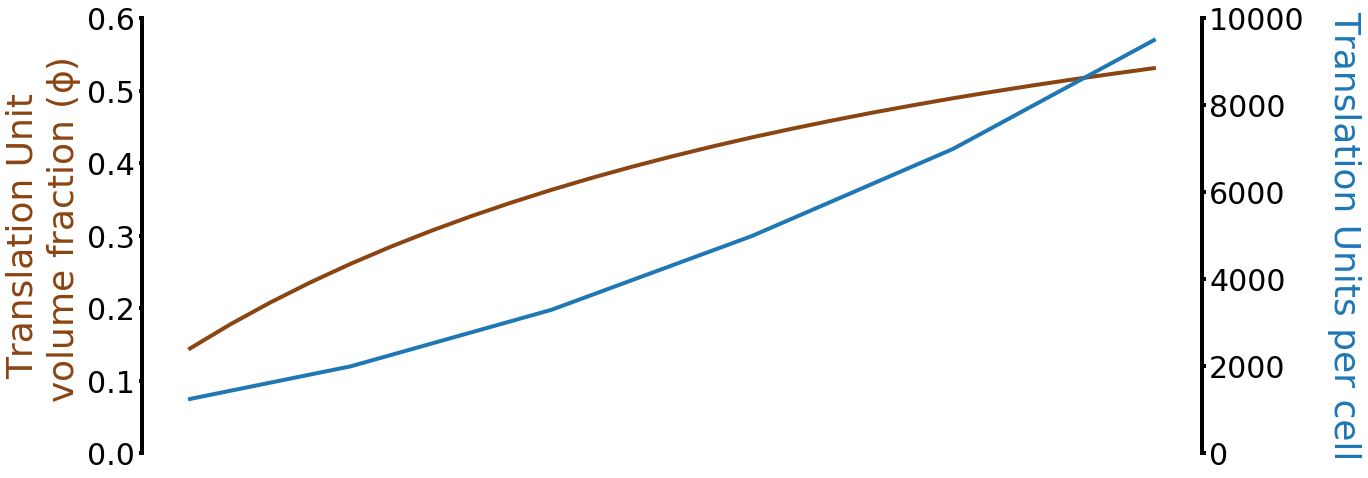

In [3]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(19,8))

ax1.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='saddlebrown',linewidth=4)

ax1.set_ylabel("Translation Unit\n volume fraction ($\mathregular{\phi}$)",fontsize=36,color='saddlebrown')
ax1.tick_params(axis='both', which='major', width=4,labelsize=30)

ax1.set_ylim(0,0.6)


ax2 = ax1.twinx()
ax2.set_ylabel("Translation Units per cell",fontsize=36,rotation=270,color='C0')
ax2.tick_params(axis='both', which='major',width=4, labelsize=30)
ax2.yaxis.set_label_coords(1.15, 0.5) 
#ax1.yaxis.set_label_coords(-0.05, 0.5) 

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)
ax1.get_xaxis().set_visible(False)
ax2.set_ylim(0,10000)


ax2.plot([0.6,1.0,1.5,2,2.5,3.0],[1250,2000,3300,5000,7000,9500], color='C0',linewidth=4)